In [22]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [23]:
titanic = pd.read_csv('../../titanic/titanic/train.csv')

In [24]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
X = titanic[['Pclass', 'Age', 'Sex']]
y = titanic['Survived']

In [26]:
X['Age'] = X['Age'].fillna(X['Age'].mean())

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

X_train['Sex'] = X_train['Sex'].map({'male':0,'female':1})
X_test['Sex'] = X_test['Sex'].map({'male':0,'female':1})

In [28]:
X_train

,Pclass,Age,Sex
110,1,47.000000,0
360,3,40.000000,0
364,3,29.699118,0
320,3,22.000000,0
296,3,23.500000,0
...,...,...,...
658,2,23.000000,0
578,3,29.699118,1
728,2,25.000000,0
391,3,21.000000,0


## RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print('The accuracy of Random Forest Classifier on testing set:', rfc.score(X_test, y_test))

The accuracy of Random Forest Classifier on testing set: 0.8295964125560538


## XGBoost

In [30]:
from xgboost import XGBClassifier
params ={}
xgbc = XGBClassifier()
# XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
#        gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
#        min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
#        objective='binary:logistic', reg_alpha=0, reg_lambda=1,
#        scale_pos_weight=1, seed=0, silent=True, subsample=1)
xgbc.fit(X_train, y_train)
print('The accuracy of eXtreme Gradient Boosting Classifier on testing set:', xgbc.score(X_test, y_test))

[09:12:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of eXtreme Gradient Boosting Classifier on testing set: 0.8251121076233184


## Titanic Competition with XGBoost + GridSearchCV

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [33]:
 
from sklearn.model_selection import train_test_split

# Read the data
orig_X =  pd.read_csv('../../titanic/titanic/train.csv')
orig_X['Label'] = 'train'

orig_X_test =  pd.read_csv('../../titanic/titanic/test.csv')
orig_X_test['Label'] = 'test'

# Process as full dataset
orig_X.dropna(axis=0, subset=['Survived'], inplace=True) # Drop rows with uknown survival
X_full = pd.concat([orig_X.drop('Survived', axis = 1), orig_X_test], axis = 0)
X_full.drop('PassengerId', axis = 1, inplace=True)

# Select categorical columns
print("Categorical features: ", [cname for cname in X_full.columns if X_full[cname].dtype == "object"])

# Select numeric columns
print("Numeric features: ", [cname for cname in X_full.columns if X_full[cname].dtype in ['int64', 'float64']])

X_full.head()

Categorical features:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Label']
Numeric features:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [34]:
# Determine the number of missing values in each column of training data
missing_val_count_by_column = (X_full.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64


In [35]:
X_full.dtypes   

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Label        object
dtype: object

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Remove unuseful features
X_full.drop('Name', axis=1, inplace=True)
X_full.drop('Ticket', axis=1, inplace=True)
X_full.drop('Cabin', axis=1, inplace=True)

# Setup method for missing data using a median imputer for important numeric features
num_simple_imputer = SimpleImputer(strategy='median')
numeric_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
num_transformed = pd.DataFrame(num_simple_imputer.fit_transform(X_full[numeric_features]))
num_transformed.columns = numeric_features

# Setup one hot enoding for catagorical features
cat_simple_imputer = SimpleImputer(strategy='constant', fill_value='missing')
categorical_features = ['Embarked','Sex', 'Label']
cat_transformed = pd.DataFrame(cat_simple_imputer.fit_transform(X_full[categorical_features]))
cat_transformed.columns = categorical_features
X_dummies = pd.get_dummies(cat_transformed, columns = categorical_features)
X_full = pd.concat([num_transformed, X_dummies], axis = 1)

print(X_full.dtypes)
print(X_full.head())

Age                 float64
Fare                float64
Pclass              float64
SibSp               float64
Parch               float64
Embarked_C            uint8
Embarked_Q            uint8
Embarked_S            uint8
Embarked_missing      uint8
Sex_female            uint8
Sex_male              uint8
Label_test            uint8
Label_train           uint8
dtype: object
    Age     Fare  Pclass  SibSp  Parch  Embarked_C  Embarked_Q  Embarked_S  \
0  22.0   7.2500     3.0    1.0    0.0           0           0           1   
1  38.0  71.2833     1.0    1.0    0.0           1           0           0   
2  26.0   7.9250     3.0    0.0    0.0           0           0           1   
3  35.0  53.1000     1.0    1.0    0.0           0           0           1   
4  35.0   8.0500     3.0    0.0    0.0           0           0           1   

   Embarked_missing  Sex_female  Sex_male  Label_test  Label_train  
0                 0           0         1           0            1  
1              

## Examine Attribute Correlations

<AxesSubplot:>

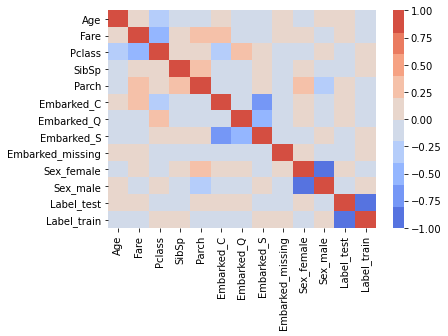

In [40]:
import seaborn as sns
corr = X_full.corr()
sns.heatmap(corr, cmap = sns.color_palette("coolwarm", 10))

In [41]:
# Split your data
X = X_full[X_full['Label_train'] == 1].copy()
X_test = X_full[X_full['Label_test'] == 1].copy()

# Drop your labels
X.drop('Label_train', axis=1, inplace=True)
X.drop('Label_test', axis=1, inplace=True)
X_test.drop('Label_test', axis=1, inplace=True)
X_test.drop('Label_train', axis=1, inplace=True)
y = orig_X.Survived

In [43]:
 
print("Full column list: ", X.columns)
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)

    regressor_OLS.summary()
    return x, columns

SL = 0.05
data_modeled, selected_columns = backwardElimination(X.values, y.values, SL, X.columns)

# Creating a Dataframe with the columns selected using the p-value and correlation
new_df = pd.DataFrame(data = data_modeled, columns = selected_columns)

print("Columns to remove: ", set(X.columns).symmetric_difference(new_df.columns))

Full column list:  Index(['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Embarked_missing', 'Sex_female', 'Sex_male'],
      dtype='object')
Columns to remove:  {'Parch', 'Fare'}


In [44]:
# Remove columns
X.drop('Fare', axis=1, inplace=True)
X.drop('Parch', axis=1, inplace=True)
X_test.drop('Fare', axis=1, inplace=True)
X_test.drop('Parch', axis=1, inplace=True)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                                random_state=0)

## Use of GridSearchCV Search to Determine the Best Model Parameters

Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: reg:pseudohubererror
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie

In [49]:
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Initial model
model = XGBClassifier(random_state = 18,objective='reg:squarederror')
params ={
              'objective':'reg:squarederror',  # 线性回归问题
              #'objective': 'reg:linear',      # 线性回归问题，早期版本的参与，将被reg:squarederror替换
              'random_state': 18
            }
# Set up GridSearchCV in order to determine the best parameters for a gradient boosting model
grid_param = {  
    'n_estimators': [12, 25, 50, 75],  #弱学习器的数量
    'max_depth': [3, 4, 5],            #默认是6，树的最大深度，值越大，越容易过拟合；[0，∞]
    'learning_rate': [0.01, 0.05, 0.1]
    #,    'early_stopping_rounds': [3, 4, 5, 6]
    }

gd_sr = GridSearchCV(estimator = model, param_grid = grid_param, 
                     cv = 3, n_jobs = -1, verbose = 2)

gd_sr.fit(X_train, y_train)  
best_parameters = gd_sr.best_params_
print('best_parameters',best_parameters)  

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.5s
{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 75}
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   15.6s finished


In [50]:
best_parameters

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 75}

In [ ]:
# Create a final model fit to these parameters
xgb = XGBClassifier(early_stopping_rounds = 3, eval_set = [(X_valid, y_valid)], learning_rate = 0.05, 
                    max_depth = 5, n_estimators = 50)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_valid)

# Get mean absolute error
print('MAE:', mean_absolute_error(y_valid, y_pred))

In [ ]:
# Form confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_pred)

## Create Submission

In [ ]:
final_preds = xgb.predict(X_test)

# Save test predictions to file
output = pd.DataFrame({'PassengerId': orig_X_test.PassengerId,'Survived': final_preds})
output
output.to_csv('submission.csv', index=False)